In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving placement.csv to placement.csv
User uploaded file "placement.csv" with length 1386 bytes


In [ ]:
df =  pd.read_csv('placement.csv',on_bad_lines='skip')

In [ ]:
df.head()

,S.NO,cgpa,iq,placement
0,0,6.8,122,1
1,1,5.9,100,0
2,2,5.2,121,0
3,3,6.4,130,1
4,4,7.2,123,0


In [ ]:
df.info

<bound method DataFrame.info of      S.NO  cgpa  iq   placement
0       0   6.8  122          1
1       1   5.9  100          0
2       2   5.2  121          0
3       3   6.4  130          1
4       4   7.2  123          0
..    ...   ...  ...        ...
97     97   7.6   75          0
98     98   6.0   46          1
99     99   7.4  182          1
100   100   5.2  225          1
101   101   8.8   98          1

[102 rows x 4 columns]>

In [ ]:
df.shape

(102, 4)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,122,1
1,5.9,100,0
2,5.2,121,0
3,6.4,130,1
4,7.2,123,0


In [ ]:
# steps 

# 0. Preprocess + EDA + feature Selection
# 1. Extrac input and output cols
# 2. Scale the values 
# 3. Train test split
# 4. Train the model 
# 5. Evaluate the model/model selection
# 6. Deploy the model 


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

KeyError: ignored

In [ ]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
x

,cgpa,iq
0,6.8,122
1,5.9,100
2,5.2,121
3,6.4,130
4,7.2,123
...,...,...
97,7.6,75
98,6.0,46
99,7.4,182
100,5.2,225


In [ ]:
y.shape

(102,)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
x_train

,cgpa,iq
0,6.8,122
22,6.2,88
94,6.4,110
11,7.1,110
9,9.2,100
...,...,...
93,7.2,165
56,5.3,204
24,7.8,76
66,7.2,85


In [ ]:
y_train

0     1
22    1
94    0
11    1
9     1
     ..
93    1
56    0
24    1
66    0
73    0
Name: placement, Length: 91, dtype: int64

In [ ]:
x_test

,cgpa,iq
14,8.7,98
5,7.5,132
71,5.8,220
3,6.4,130
95,8.2,96
99,7.4,182
54,5.0,202
40,6.4,166
29,8.7,133
48,9.2,154


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=955b215aff668d5f065175ded3eceb866358114007ec18e8dae950e7470629f7
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

array([[-0.03846308, -0.03364241],
       [-0.36660124, -0.746585  ],
       [-0.25722185, -0.28526921],
       [ 0.125606  , -0.28526921],
       [ 1.27408954, -0.49495821],
       [ 0.39905446,  0.72123798],
       [-0.47598062, -1.62727879],
       [ 0.18029569,  1.05674038],
       [-0.20253216, -1.165963  ],
       [ 0.39905446, -0.24333141],
       [-0.53067031,  1.60193177],
       [ 1.32877923,  0.88898918],
       [ 0.836572  , -0.03364241],
       [-1.29632601, -0.956274  ],
       [-0.20253216,  0.63736238],
       [ 1.38346892, -0.5788338 ],
       [-0.47598062, -1.2079008 ],
       [ 0.01622661,  1.83258967],
       [ 0.34436477, -0.6627094 ],
       [-0.03846308, -0.7046472 ],
       [ 1.43815862,  0.05023319],
       [ 0.61781323,  0.44864228],
       [ 1.49284831,  2.65037676],
       [-1.13225693,  0.42767338],
       [ 1.547538  ,  1.28739827],
       [-0.31191154, -1.64824769],
       [ 1.71160708,  0.72123798],
       [-2.11667139,  1.28739827],
       [ 0.50843384,

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[ 1.00064108, -0.536896  ],
       [ 0.34436477,  0.17604659],
       [-0.58536   ,  2.02130977],
       [-0.25722185,  0.13410879],
       [ 0.72719261, -0.5788338 ],
       [ 0.28967507,  1.22449157],
       [-1.02287754,  1.64386957],
       [-0.25722185,  0.88898918],
       [ 1.00064108,  0.19701549],
       [ 1.27408954,  0.63736238],
       [-0.74942908, -0.536896  ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf =  LogisticRegression()

In [ ]:
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_test

14    0
5     0
71    0
3     1
95    1
99    1
54    1
40    1
29    1
48    0
25    0
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.45454545454545453

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


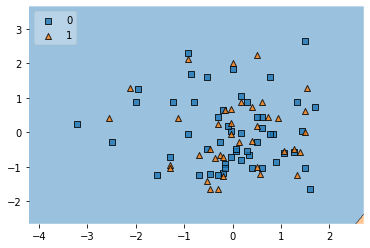

In [ ]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))